# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [4]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,4


In [5]:
attrition_data.shape

(1028, 34)

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

In [6]:
data = pd.get_dummies(attrition_data)
data.head()
data.shape
#data.info()

(1028, 55)

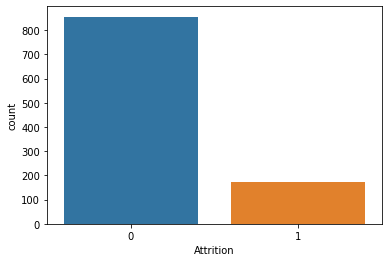

0    856
1    172
Name: Attrition, dtype: int64

In [11]:
sns.countplot(attrition_data['Attrition'])
plt.show()
attrition_data.Attrition.value_counts()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff169d91320>,
      dtype=object)

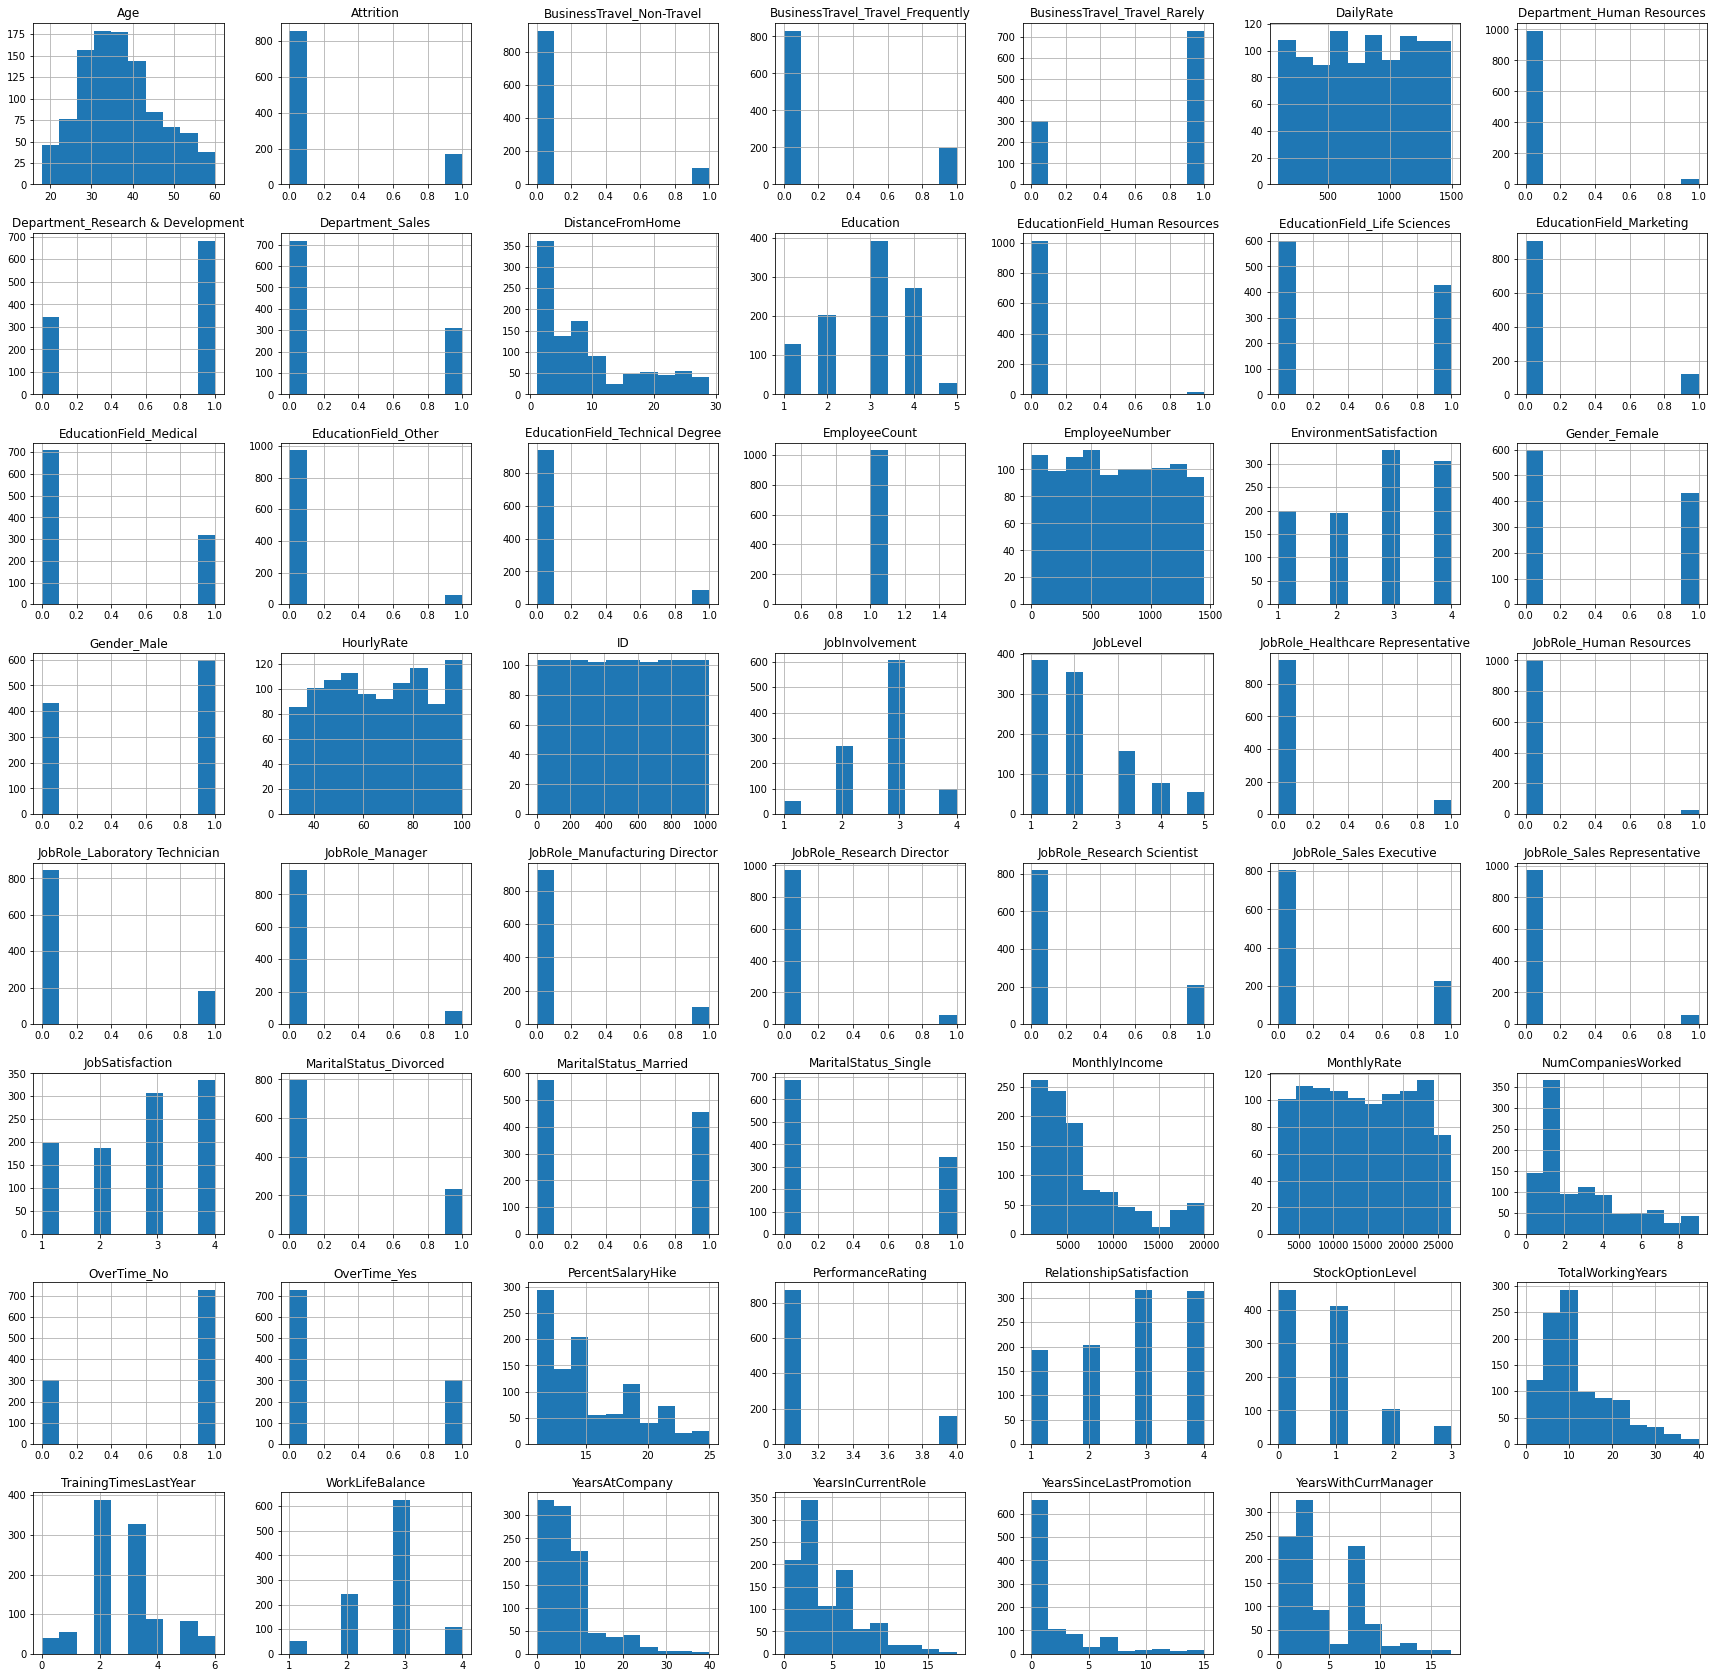

In [0]:
data.hist(figsize=(30,30)) 

In [0]:
# Checking for missing values
print(data.isna().sum())

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager     

In [12]:
###Using the Feature importance method, these columns have been dropped from the modelling as their 
### importance was less than 5%
normalized_df=(data-data.min())/(data.max()-data.min())
normalized_df.head()
normalized_df = normalized_df.drop(['EmployeeCount', 'ID', 'PercentSalaryHike', 'YearsWithCurrManager', 'JobRole_Manager',
                                    'Gender_Male', 'JobRole_Laboratory Technician', 'JobRole_Healthcare Representative',
                                    'JobRole_Manufacturing Director', 'EducationField_Medical', 'BusinessTravel_Travel_Rarely', 'Department_Sales'], axis=1)
normalized_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Other,EducationField_Technical Degree,Gender_Female,JobRole_Human Resources,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,1.0,0.715820,0.000000,0.25,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.000692,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,0.002075,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,0.002766,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.004149,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [0]:
# Visualizing the correlation matrix (not feasible as the number of features are too much)
plt.figure(figsize=(30,30))
mask = np.zeros_like(normalized_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(normalized_df.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [61]:
# separate the labels and the features - method 1 
label = normalized_df['Attrition'] #label
features_df = normalized_df.drop(['Attrition'], axis=1) #features
zx = np.array(label)
print(zx.shape)
px = np.array(features_df)
print(px.shape)

(1028,)
(1028, 42)


In [60]:
dat = zx.reshape((zx.shape[0], 1))
print(dat.shape)

(1028, 1)


In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [68]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(px, dat)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(px)
# Summarize selected features
print(features[:,:])
print(normalized_df.columns)

[3.265e+00 4.420e-01 2.255e+00 2.460e-01 1.263e-01 3.358e+00 5.805e-02
 2.465e+00 8.757e+00 2.263e+00 6.077e+00 1.117e-01 3.735e-01 2.446e-02
 5.918e-01 8.137e+00 4.621e+00 1.573e-01 3.969e-01 2.553e+00 4.498e+00
 3.393e-01 3.514e+00 7.181e+00 2.088e-01 1.110e+00 1.243e-01 3.319e-01
 1.562e+00 2.700e-02 3.843e+00 4.353e-01 2.546e-02 7.538e+00 3.155e-01
 3.119e-03 2.634e+01 8.750e+00 4.548e+00 2.395e+01 2.044e+01 4.914e+01]
[[0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',

In [0]:
# split data into X and y
X_train, X_test, y_train, y_test = train_test_split(features_df, label, train_size=0.8, random_state=123)

In [0]:
# Initialising the classifier and fitting it 
xgb_clf = xgb.XGBClassifier(learning_rate=0.01)
model_xgb = xgb_clf.fit(X_train, y_train)

In [17]:
# Applying classifier on train (seen) set
predictions = xgb_clf.predict(X_train)
# accuracy score
accuracy = accuracy_score(y_train, predictions)
print(np.round(accuracy*100, 2), '%')

87.1 %


In [18]:
# Applying classifier on test (unseen) set
predictions = xgb_clf.predict(X_test)
# accuracy score
accuracy = accuracy_score(y_test, predictions)
print(np.round(accuracy*100, 2), '%')

83.5 %


In [19]:
print(confusion_matrix(y_test, predictions))
print("="*60)
print(classification_report(y_test, predictions))

[[164   8]
 [ 26   8]]
              precision    recall  f1-score   support

         0.0       0.86      0.95      0.91       172
         1.0       0.50      0.24      0.32        34

    accuracy                           0.83       206
   macro avg       0.68      0.59      0.61       206
weighted avg       0.80      0.83      0.81       206



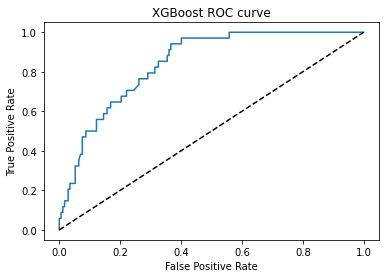

In [0]:
from sklearn.metrics import roc_curve  
probs = xgb_clf.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC curve')
# show the plot
plt.show()

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

## **Using K-nearest neighbors**

In [0]:
# data_norm = pd.DataFrame(data)
# data_norm.head(9)

In [0]:
# separate the labels and the features - method 1 
label_knn = normalized_df['Attrition']
features_df_knn = normalized_df.drop(['Attrition'], axis=1)

In [0]:
# split data into X and y
X_train, X_test, y_train, y_test = train_test_split(features_df_knn, label_knn, train_size=0.8)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [0]:
# Train the model using the training sets
model_knn = knn.fit(features_df_knn,label_knn)

In [24]:
# Applying classifier on train (seen) set
pred_knn = knn.predict(X_train)
# accuracy score
acc_knn = accuracy_score(y_train, pred_knn)
print(np.round(acc_knn*100, 2), '%')

87.1 %


In [25]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

# # accuracy score
acc_knn_test = accuracy_score(y_test, y_pred)
print(np.round(acc_knn_test*100, 2), '%')
# accuracy = accuracy_score(y_train, predictions)


86.89 %


In [26]:
print(confusion_matrix(y_test, y_pred))
print("="*60)
print(classification_report(y_test, y_pred))

[[164   2]
 [ 25  15]]
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92       166
         1.0       0.88      0.38      0.53        40

    accuracy                           0.87       206
   macro avg       0.88      0.68      0.73       206
weighted avg       0.87      0.87      0.85       206



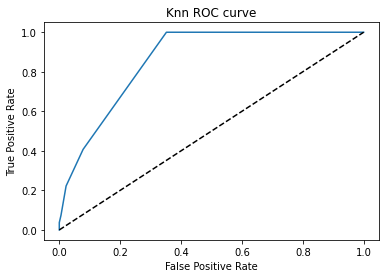

In [0]:
#Plotting the roc_curve

probs = knn.predict_proba(X_test)  
probs = probs[:, 1] 
fper, tper, thresholds = roc_curve(y_test, probs) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Knn ROC curve')
# show the plot
plt.show()

# **Using K-fold validation**

In [0]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
kfold = StratifiedKFold(n_splits=10, random_state=123)
results = cross_val_score(knn, features_df_knn, label_knn, cv=kfold)
print(results)

[0.78640777 0.85436893 0.7961165  0.80582524 0.88349515 0.81553398
 0.85436893 0.83495146 0.83333333 0.82352941]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 82.88% (2.82%)


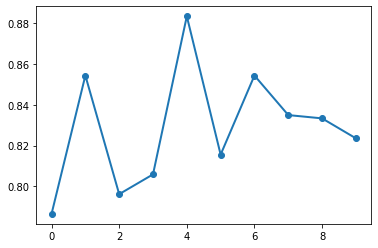

In [0]:
plt.plot(np.arange(10), results, 'o-', linewidth=2)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Random forest classifier

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features_df_knn, label_knn, train_size=0.8)

In [0]:
from sklearn.metrics import accuracy_score

test_scores, train_scores = [], []
for i in [1, 2, 3, 4, 5, 10, 20, 50, 75]:

    rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
    rfc.fit(X_train, y_train) # print(rfc)

    train_predictions = rfc.predict(X_train)
    test_predictions = rfc.predict(X_test)

    train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
    test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

print("The training scores were: {}".format(train_scores))
print("The testing scores were: {}".format(test_scores))


The training scores were: [0.91, 0.92, 0.96, 0.94, 0.97, 0.98, 0.99, 1.0, 1.0]
The testing scores were: [0.76, 0.88, 0.82, 0.86, 0.85, 0.88, 0.88, 0.9, 0.9]


# **Applying the grid search parameter to random forest**

In [0]:
 rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [0]:
model = rfc.fit(X_train, y_train) # print(rfc)
train_predictions = rfc.predict(X_train)
test_predictions = rfc.predict(X_test)


In [0]:
train_score = accuracy_score(y_train, train_predictions)
test_score = accuracy_score(y_test, test_predictions)
print(train_score, test_score)

0.8905109489051095 0.8932038834951457


In [0]:
cm_gs = confusion_matrix(y_test, test_predictions)
print(cm_gs)
print("="*60)
print(classification_report(y_test, test_predictions))

[[180   1]
 [ 21   4]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       181
         1.0       0.80      0.16      0.27        25

    accuracy                           0.89       206
   macro avg       0.85      0.58      0.60       206
weighted avg       0.88      0.89      0.86       206



Testing for plotting all the features along with it's importance

In [0]:
importances = model_xgb.feature_importances_


In [33]:
normalized_df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'Department_Human Resources', 'Department_Research & Development',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female',
       'JobRole_Human Resources', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Divo

In [34]:
normalized_df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Other,EducationField_Technical Degree,Gender_Female,JobRole_Human Resources,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,1.0,0.715820,0.000000,0.25,0.000000,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.000692,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,0.002075,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,0.002766,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.004149,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


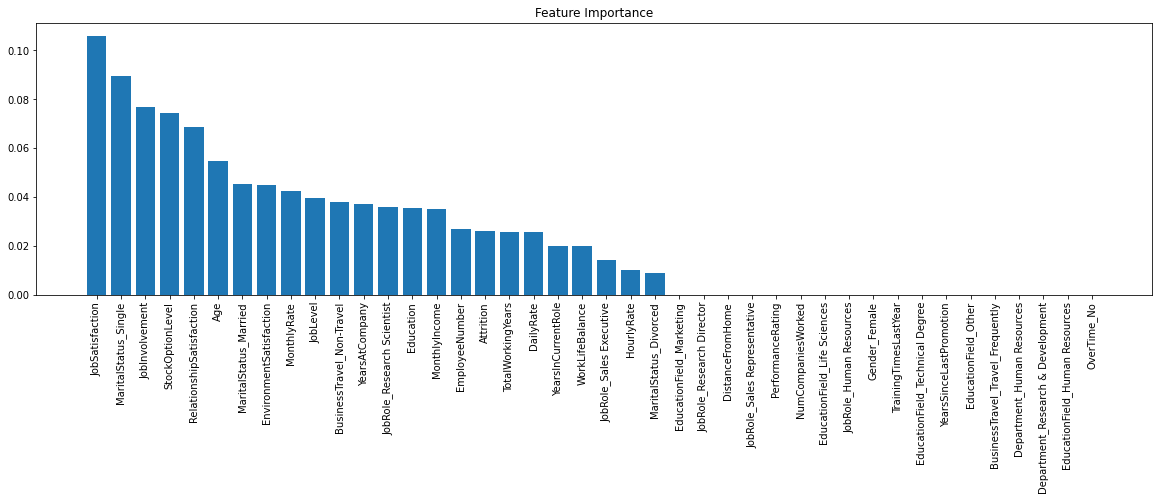

In [32]:
importances = model_xgb.feature_importances_


### Visualize Feature Importance

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [normalized_df.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,5))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(features_df_knn.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(features_df_knn.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [35]:
indices

array([10, 40,  8, 16, 15,  0, 39,  6, 12,  9, 23, 20, 35,  4, 11,  5,  1,
       17,  2, 21, 19, 36,  7, 38, 29, 34,  3, 37, 14, 13, 28, 33, 32, 18,
       31, 22, 30, 24, 25, 26, 27, 41])

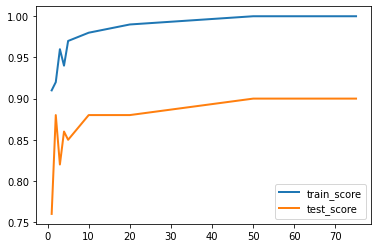

In [0]:
z = [1, 2, 3, 4, 5, 10, 20, 50,75]
plt.plot(z, train_scores, linewidth=2)
plt.plot(z, test_scores, linewidth=2)
plt.legend(['train_score', 'test_score'], loc='lower right')

In [0]:
#confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(cm)
print("="*60)
print(classification_report(y_test, test_predictions))

[[180   1]
 [ 21   4]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       181
         1.0       0.80      0.16      0.27        25

    accuracy                           0.89       206
   macro avg       0.85      0.58      0.60       206
weighted avg       0.88      0.89      0.86       206



# Parameter tuning using grid_search

In [0]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 75,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1111,
 'verbose': 0,
 'warm_start': False}


In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
# Fitting the grid search 
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx #
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.7min finished


({'bootstrap': True,
  'max_depth': 80,
  'max_features': 3,
  'min_samples_leaf': 3,
  'min_samples_split': 8,
  'n_estimators': 200},
 0.838199513381995)

In [0]:
# Printing the arguments of the classifier 
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1111,
                       verbose=0, warm_start=False)

In [0]:
from numpy import array
from numpy import reshape


In [54]:
data_tw = np.array(features_df)
type(data_tw)
data.shape

(1028, 55)